# Data Exploration

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 9)

## Phone Types

In [2]:
df_phones = pd.read_csv('../data/raw/phone_types.csv')
df_phones

,pid,phonetype
0,BK7610,iPhone
1,BU4707,iPhone
2,CC6740,Android
3,DC6359,iPhone
4,DK3500,iPhone
5,HV0618,iPhone
6,JB3156,Android
7,JR8022,iPhone
8,MC7070,iPhone
9,MJ8002,iPhone


## Accelerometer

In [3]:
df_acc = pd.read_csv('../data/raw/all_accelerometer_data_pids_13.csv', 
                        sep = ',',
                        dtype={'x': np.float32, 'y': np.float32, 'z': np.float32})

In [4]:
df_acc.head(10)

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163
5,1493733883945,SA0297,-0.2888,0.0514,-0.0145
6,1493733883953,SA0297,-0.0413,-0.0184,-0.0105
7,1493733883957,SA0297,-0.0413,-0.0001,0.0017
8,1493733883963,SA0297,-0.0286,-0.0028,-0.0094
9,1493733883974,SA0297,-0.0543,-0.0410,-0.0109


In [5]:
df_acc.tail(10)

,time,pid,x,y,z
14057557,1493829248070,CC6740,-0.179745,0.231997,0.248179
14057558,1493829248095,CC6740,-0.126265,0.212185,0.247532
14057559,1493829248120,CC6740,-0.074806,0.225877,0.136828
14057560,1493829248145,CC6740,-0.061298,0.238949,0.218522
14057561,1493829248169,CC6740,-0.059723,0.065230,0.048254
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393
14057566,1493829248294,CC6740,-0.107288,0.153548,0.168595


In [6]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057567 entries, 0 to 14057566
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   pid     object 
 2   x       float32
 3   y       float32
 4   z       float32
dtypes: float32(3), int64(1), object(1)
memory usage: 375.4+ MB


In [7]:
df_acc.describe()

,time,x,y,z
count,1.405757e+07,1.405757e+07,1.405757e+07,1.405757e+07
mean,1.493778e+12,-9.269841e-03,-7.168398e+06,7.168398e+06
std,5.640453e+08,9.540696e-01,3.528998e+07,3.528998e+07
min,0.000000e+00,-4.333507e+01,-1.809008e+08,-4.902300e+01
25%,1.493755e+12,-5.700000e-03,-4.500000e-03,-4.200000e-03
50%,1.493779e+12,-2.000000e-04,-2.000000e-04,6.100000e-03
75%,1.493801e+12,7.600000e-03,4.500000e-03,4.605889e-02
max,1.493829e+12,3.922540e+01,2.731123e+01,1.809008e+08


Let's check, whether all devices contain a similar amount of data points

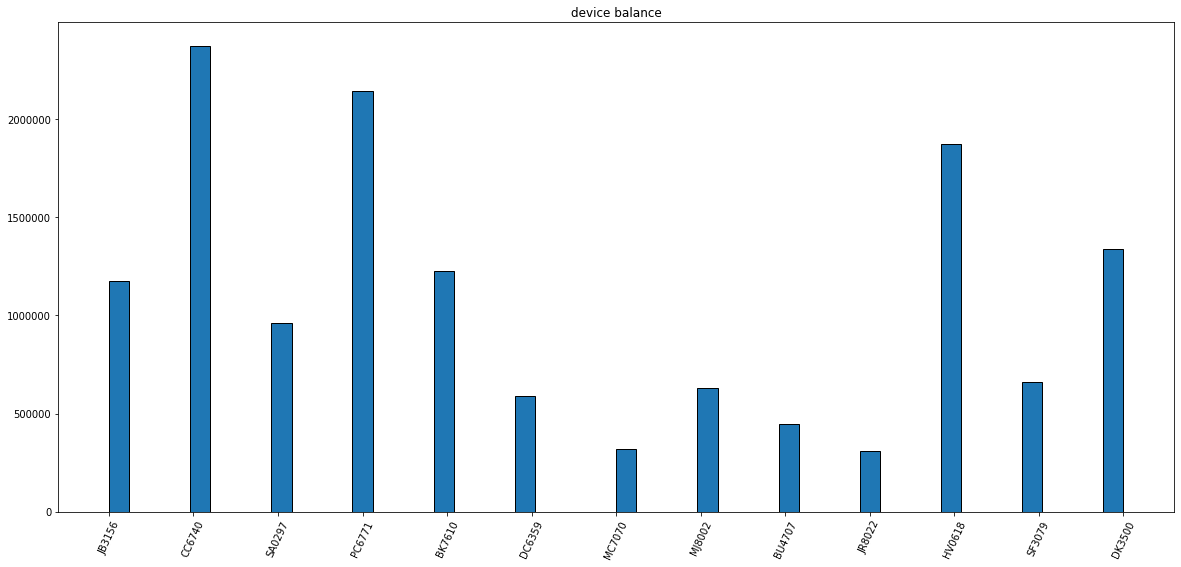

In [8]:
plt.hist(df_acc['pid'], bins = 50, edgecolor = 'k');
plt.xticks(rotation=65)
plt.title('device balance');

The dataset definitly needs to be splitted before any further processing.

## TAC

In [9]:
tac_columns = ['TAC Level', 'IR Voltage', 'Temperature', 'Time', 'Date']

In [10]:
df_tac = pd.read_excel('../data/raw/raw_tac/BK7610 CAM Results.xlsx',
                       skiprows=1,
                       usecols=tac_columns,
                       dtype={tac_columns[0]: np.float32, tac_columns[1]: np.float32, tac_columns[2]: np.float32, })

In [11]:
df_tac

,TAC Level,IR Voltage,Temperature,Time,Date
0,0.000,1.127,74.955002,2017-05-02 10:36:54,2017-05-02 10:36:54
1,0.000,1.121,74.955002,2017-05-02 11:09:57,2017-05-02 11:09:57
2,0.000,1.069,76.626999,2017-05-02 11:15:27,2017-05-02 11:15:27
3,0.000,1.060,77.371002,2017-05-02 11:20:57,2017-05-02 11:20:57
4,0.000,1.108,77.929001,2017-05-02 11:26:26,2017-05-02 11:26:26
5,0.000,1.049,78.300003,2017-05-02 11:31:56,2017-05-02 11:31:56
6,0.000,1.058,78.858002,2017-05-02 11:37:25,2017-05-02 11:37:25
7,0.000,1.101,79.416000,2017-05-02 11:42:54,2017-05-02 11:42:54
8,0.008,1.181,79.788002,2017-05-02 11:48:23,2017-05-02 11:48:23
9,0.000,1.026,73.838997,2017-05-02 12:18:52,2017-05-02 12:18:52


In [12]:
df_tac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TAC Level    57 non-null     float32       
 1   IR Voltage   57 non-null     float32       
 2   Temperature  57 non-null     float32       
 3   Time         57 non-null     datetime64[ns]
 4   Date         57 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float32(3)
memory usage: 1.7 KB


In [13]:
df_tac.describe()

,TAC Level,IR Voltage,Temperature
count,57.000000,57.000000,57.000000
mean,0.041316,1.178491,81.564934
std,0.054115,0.151152,5.111344
min,0.000000,0.862000,73.096001
25%,0.000000,1.127000,77.929001
50%,0.008000,1.207000,79.973999
75%,0.074000,1.207000,84.806999
max,0.165000,1.849000,93.915001


# TAC clean

In [14]:
df_tac_c = pd.read_csv('../data/raw/clean_tac/BK7610_clean_TAC.csv', 
                        sep = ',',
                        dtype={'timestamp': np.float32, 'TAC_Reading': np.float64})

In [15]:
df_tac_c.head(10)

,timestamp,TAC_Reading
0,1.493719e+09,-0.000482
1,1.493721e+09,0.001573
2,1.493721e+09,0.002144
3,1.493721e+09,0.000877
4,1.493722e+09,-0.001145
5,1.493722e+09,-0.002159
6,1.493722e+09,-0.001033
7,1.493723e+09,0.001808
8,1.493723e+09,0.004542
9,1.493725e+09,0.005185


In [16]:
df_tac_c.tail(10)

,timestamp,TAC_Reading
47,1.493791e+09,0.000517
48,1.493793e+09,0.000026
49,1.493795e+09,-0.000562
50,1.493797e+09,-0.000804
51,1.493798e+09,-0.000404
52,1.493800e+09,0.000429
53,1.493802e+09,0.001055
54,1.493804e+09,0.000804
55,1.493806e+09,-0.000574
56,1.493808e+09,-0.002732


In [17]:
df_tac_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    57 non-null     float32
 1   TAC_Reading  57 non-null     float64
dtypes: float32(1), float64(1)
memory usage: 812.0 bytes


In [18]:
df_tac_c.describe()

,timestamp,TAC_Reading
count,5.700000e+01,57.000000
mean,1.493758e+09,0.041313
std,2.841950e+04,0.050705
min,1.493719e+09,-0.002732
25%,1.493729e+09,0.000744
50%,1.493756e+09,0.012099
75%,1.493782e+09,0.074544
max,1.493808e+09,0.171758
